# <center>Tabaquismo y gestación

In [4]:
#cargamos las librerias necesariias para loos analisis y los graficos 
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#cargamos nuestro documento .csv con la información dada 
dataset = pd.read_csv('baby.csv')
dataset.head()
#revisamos nuestra información para poder visualizar los datos que disponemos 

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


### 1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.


In [3]:
 dataset.describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


### 2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.


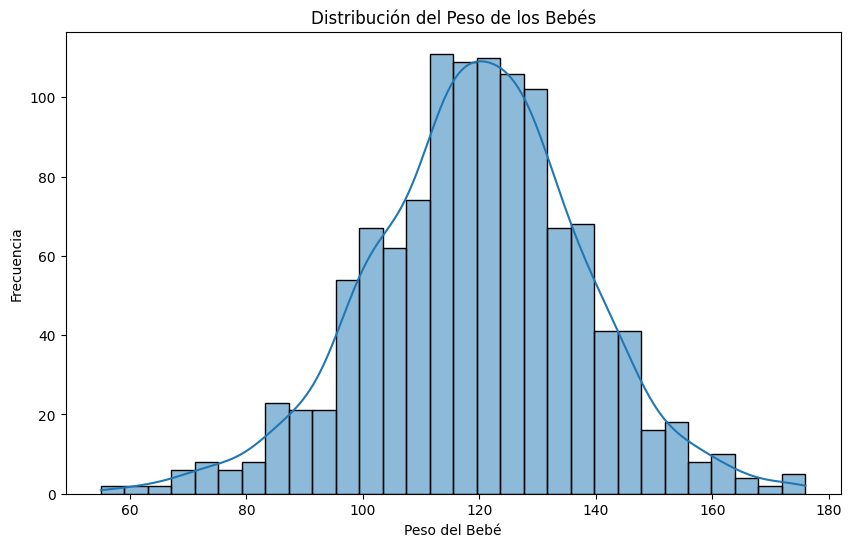

In [7]:
# Visualización de la distribución del peso de los bebés
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Birth.Weight'], kde=True, bins=30)
plt.title('Distribución del Peso de los Bebés')
plt.xlabel('Peso del Bebé')
plt.ylabel('Frecuencia')
plt.show()

### 3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales

   Percentil  Valor del Percentil  Probabilidad Teórica  Frecuencia Observada
0          5                88.00              0.043029              0.052811
1         25               108.00              0.265858              0.252129
2         50               120.00              0.511697              0.516184
3         75               131.00              0.735482              0.761499
4         95               148.35              0.942496              0.949744


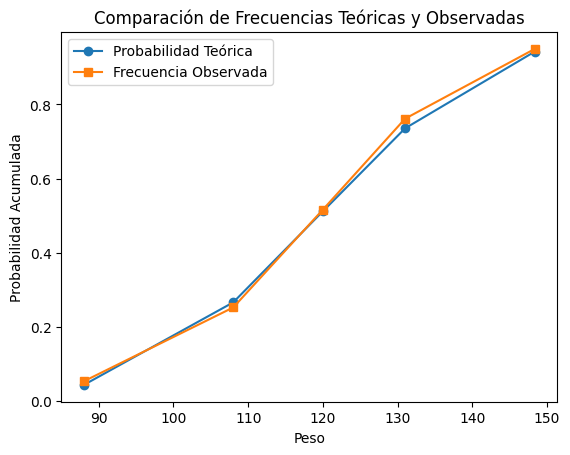

In [24]:


# Obtener la media y la desviación estándar de los pesos
mean_weight = dataset['Birth.Weight'].mean()
std_weight = dataset['Birth.Weight'].std()

# Obtener la media y la desviación estándar de los pesos
media_pesos = baby_weights_df['Birth.Weight'].mean()
desv_est_pesos = baby_weights_df['Birth.Weight'].std()

# Calcular los percentiles deseados
percentiles = [5, 25, 50, 75, 95]
valores_percentiles = np.percentile(baby_weights_df['Birth.Weight'], percentiles)

# Calcular las probabilidades teóricas de una distribución normal para los percentiles
probabilidades_teoricas = norm.cdf(valores_percentiles, media_pesos, desv_est_pesos)

# Calcular las frecuencias observadas para los valores de los percentiles
frecuencias_observadas = [np.mean(baby_weights_df['Birth.Weight'] <= valor) for valor in valores_percentiles]

# Comparar las probabilidades teóricas con las frecuencias observadas
comparacion_df = pd.DataFrame({
    'Percentil': percentiles,
    'Valor del Percentil': valores_percentiles,
    'Probabilidad Teórica': probabilidades_teoricas,
    'Frecuencia Observada': frecuencias_observadas
})

print(comparacion_df)

# Graficar la comparación
plt.plot(valores_percentiles, probabilidades_teoricas, 'o-', label='Probabilidad Teórica')
plt.plot(valores_percentiles, frecuencias_observadas, 's-', label='Frecuencia Observada')
plt.xlabel('Peso')
plt.ylabel('Probabilidad Acumulada')
plt.title('Comparación de Frecuencias Teóricas y Observadas')
plt.legend()
plt.show()

### 4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.


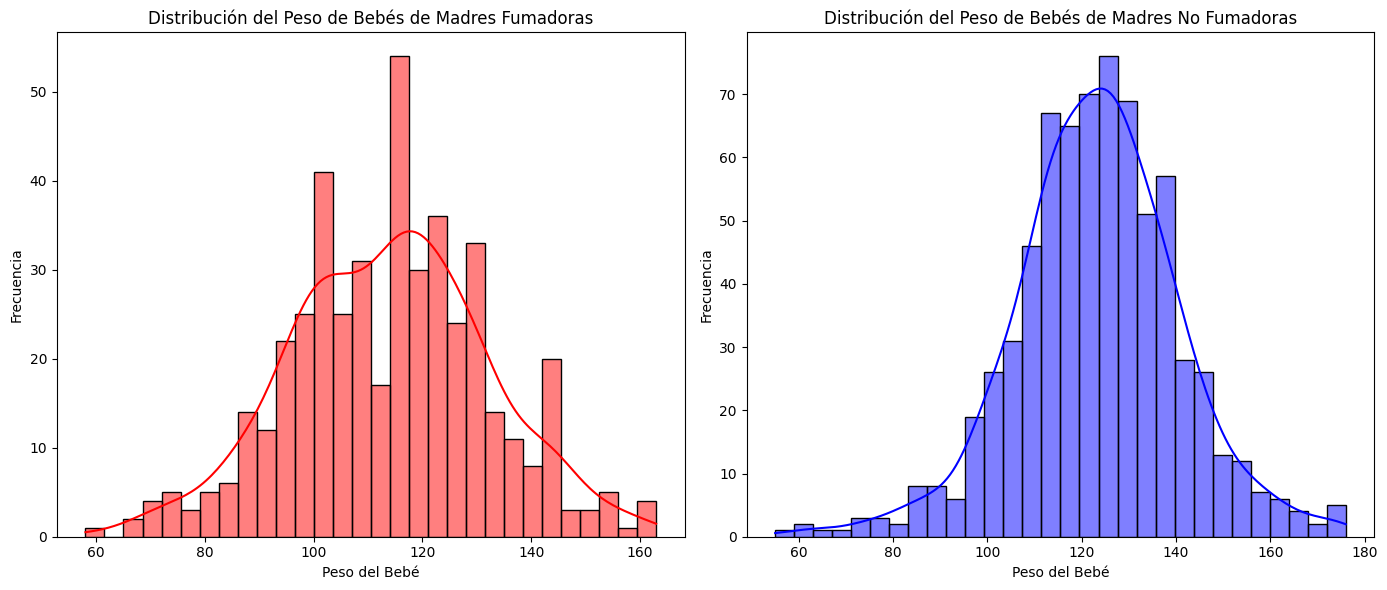

(count    459.000000
 mean     113.819172
 std       18.295010
 min       58.000000
 25%      101.000000
 50%      115.000000
 75%      126.000000
 max      163.000000
 Name: Birth.Weight, dtype: float64,
 count    715.000000
 mean     123.085315
 std       17.423695
 min       55.000000
 25%      113.000000
 50%      123.000000
 75%      134.000000
 max      176.000000
 Name: Birth.Weight, dtype: float64,
 -8.626464445756927,
 2.6564639952299482e-17)

In [11]:
from scipy.stats import norm, ttest_ind

# Separar los datos en dos grupos: madres fumadoras y no fumadoras
fumadoras = dataset[dataset['Maternal.Smoker'] == True]
no_fumadoras = dataset[dataset['Maternal.Smoker'] == False]

# Comparar las estadísticas descriptivas de ambos grupos
desc_fumadoras = fumadoras['Birth.Weight'].describe()
desc_no_fumadoras = no_fumadoras['Birth.Weight'].describe()

# Visualización de la distribución del peso de los bebés en ambos grupos
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(fumadoras['Birth.Weight'], kde=True, bins=30, color='r')
plt.title('Distribución del Peso de Bebés de Madres Fumadoras')
plt.xlabel('Peso del Bebé')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(no_fumadoras['Birth.Weight'], kde=True, bins=30, color='b')
plt.title('Distribución del Peso de Bebés de Madres No Fumadoras')
plt.xlabel('Peso del Bebé')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Realizar un test t de Student para comparar las medias de los dos grupos
t_stat, p_value_ttest = ttest_ind(fumadoras['Birth.Weight'], no_fumadoras['Birth.Weight'], equal_var=False)
desc_fumadoras, desc_no_fumadoras, t_stat, p_value_ttest

### 5. Considerando los datos dados:
 ● Calcula la probabilidad de que una madre escogida al azar fume.
 
 ● A partir del valor anterior, construye un modelo de distribución binomial que
 modele el experimento correspondiente a escoger 5 madres al azar y observar
 cuántas fuman.
 
 ● Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias
 muestrales.
 
● Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula
sus respectivas medias muestrales.


In [14]:
# Calcular la probabilidad de que una madre sea fumadora
prob_fumadora = dataset['Maternal.Smoker'].mean()
print(f'Probabilidad de que una madre sea fumadora: {prob_fumadora}')

Probabilidad de que una madre sea fumadora: 0.3909710391822828


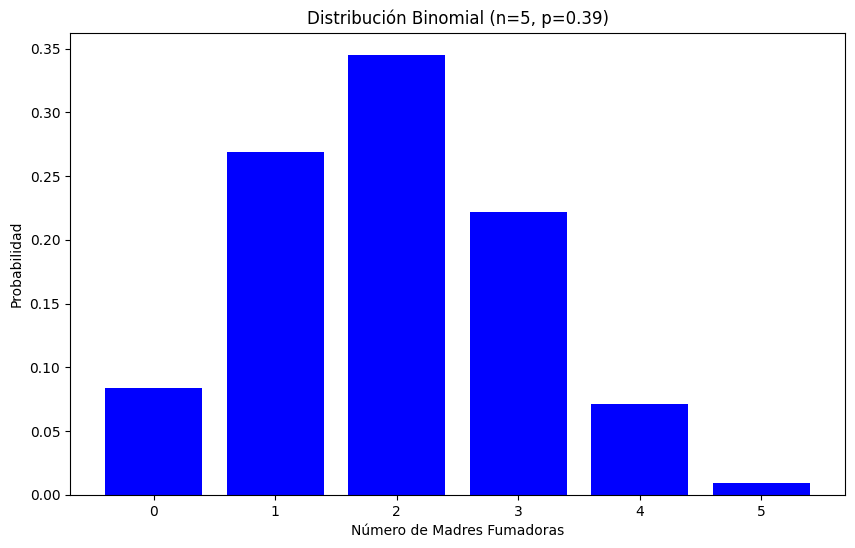

In [15]:
from scipy.stats import binom

# Construir un modelo de distribución binomial para 5 madres
n = 5
p = prob_fumadora
binom_model = binom(n, p)

# Visualizar la distribución binomial
x = range(n + 1)
y = binom_model.pmf(x)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='b')
plt.title('Distribución Binomial (n=5, p={:.2f})'.format(p))
plt.xlabel('Número de Madres Fumadoras')
plt.ylabel('Probabilidad')
plt.show()

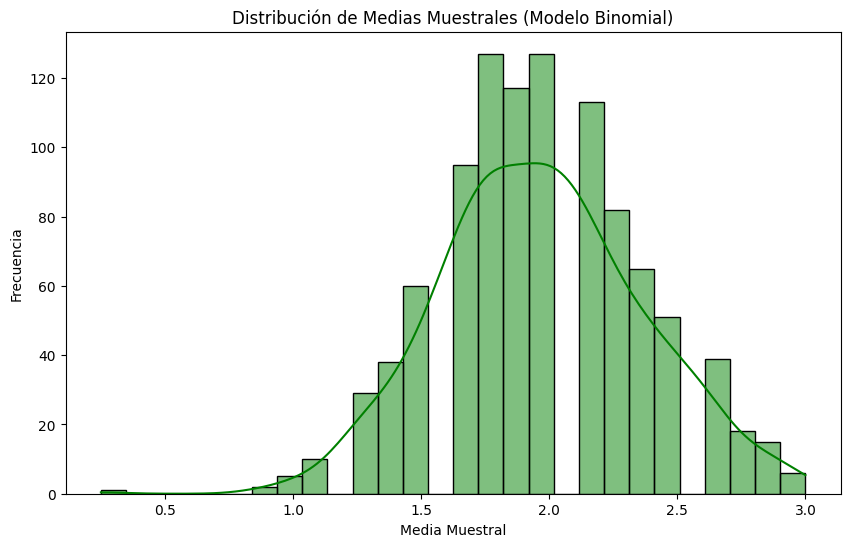

count    1000.000000
mean        1.966250
std         0.397713
min         0.250000
25%         1.750000
50%         2.000000
75%         2.250000
max         3.000000
dtype: float64


In [16]:
import numpy as np

# Simular 1000 muestras de tamaño 8 utilizando el modelo binomial
n_muestras = 1000
tamaño_muestra = 8
muestra_binomial = binom_model.rvs(size=n_muestras * tamaño_muestra).reshape(n_muestras, tamaño_muestra)
medias_binomial = muestra_binomial.mean(axis=1)

# Visualización de la distribución de las medias muestrales
plt.figure(figsize=(10, 6))
sns.histplot(medias_binomial, kde=True, color='g')
plt.title('Distribución de Medias Muestrales (Modelo Binomial)')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar algunas estadísticas descriptivas de las medias muestrales
print(pd.Series(medias_binomial).describe())

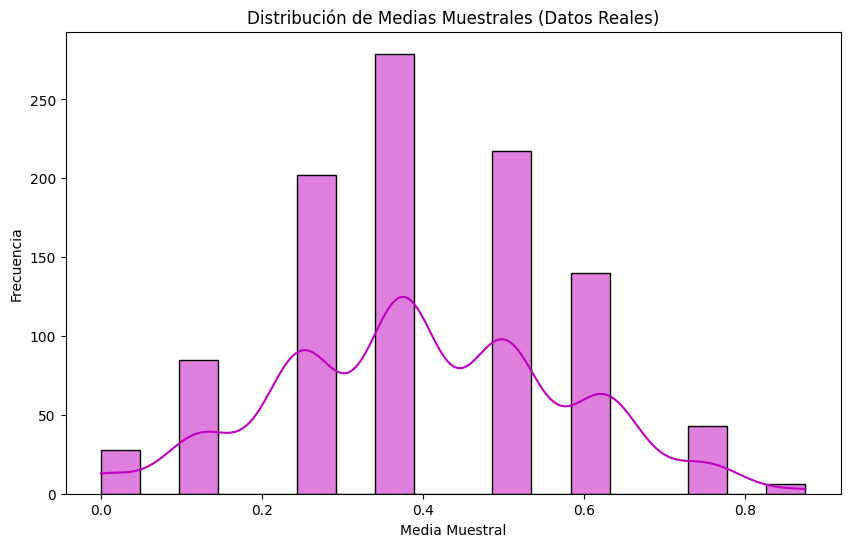

count    1000.000000
mean        0.399250
std         0.177587
min         0.000000
25%         0.250000
50%         0.375000
75%         0.500000
max         0.875000
dtype: float64


In [20]:
# Extraer 1000 muestras de tamaño 8 de los datos reales y calcular sus medias muestrales
n_muestras = 1000
tamaño_muestra = 8
medias_reales = []

for _ in range(n_muestras):
    muestra = dataset['Maternal.Smoker'].sample(n=tamaño_muestra, replace=True)
    medias_reales.append(muestra.mean())

medias_reales = np.array(medias_reales)

# Visualización de la distribución de las medias muestrales (Datos Reales)
plt.figure(figsize=(10, 6))
sns.histplot(medias_reales, kde=True, color='m')
plt.title('Distribución de Medias Muestrales (Datos Reales)')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar algunas estadísticas descriptivas de las medias muestrales reales
print(pd.Series(medias_reales).describe())


### Utilizando lo anterior:
● compara gráficamente los resultados obtenidos anteriormente.

● verifica el teorema del límite central, considerando las muestras de datos reales y
las simuladas con el modelo binomial.

● construye un modelo de distribución normal derivado del modelo binomial, y
grafícalo junto a los anteriores para comparar. Concluye.


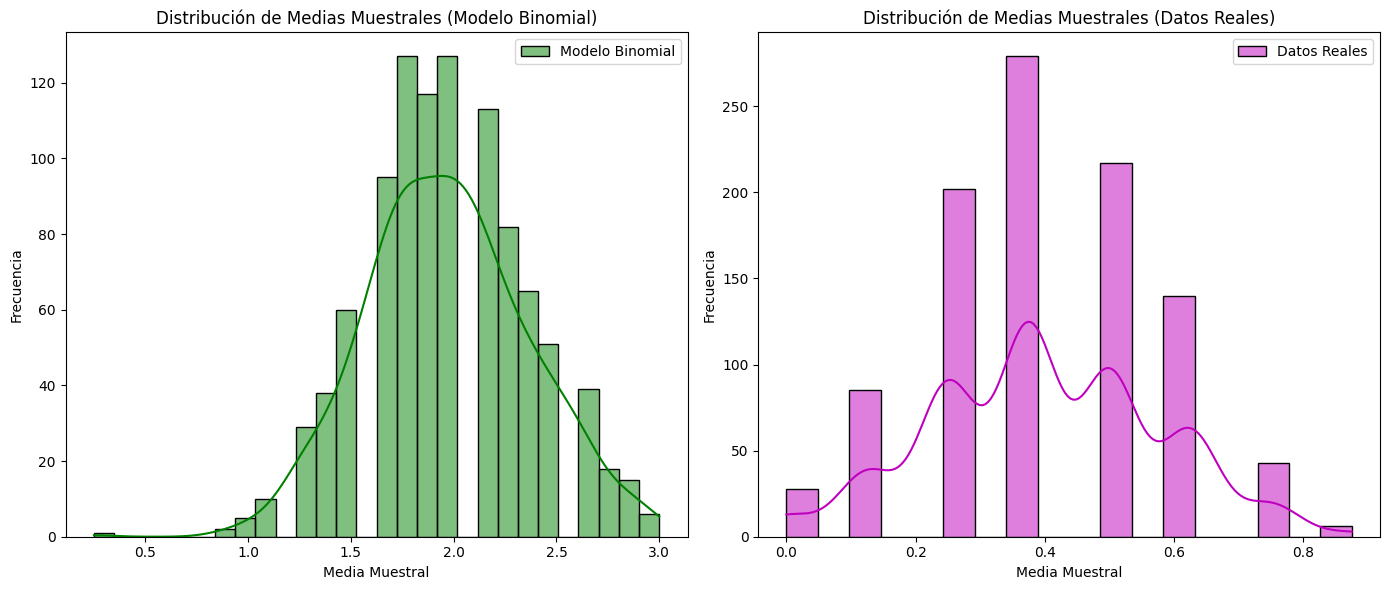

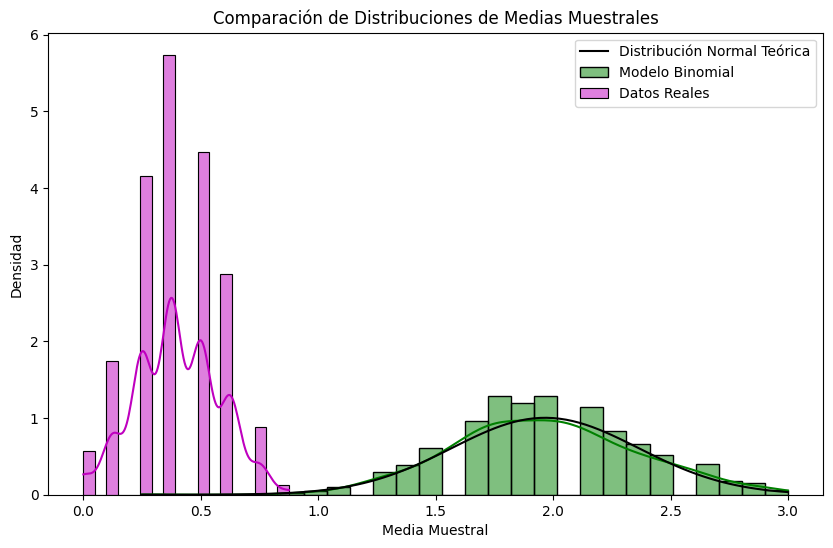

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Comparar gráficamente los resultados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(medias_binomial, kde=True, color='g', label='Modelo Binomial')
plt.title('Distribución de Medias Muestrales (Modelo Binomial)')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(medias_reales, kde=True, color='m', label='Datos Reales')
plt.title('Distribución de Medias Muestrales (Datos Reales)')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

# Verificar el teorema del límite central
# Construir un modelo de distribución normal derivado del modelo binomial y graficarlo
media_teorica = np.mean(medias_binomial)
desviacion_teorica = np.std(medias_binomial)

x = np.linspace(min(medias_binomial), max(medias_binomial), 100)
y = norm.pdf(x, media_teorica, desviacion_teorica)

plt.figure(figsize=(10, 6))
sns.histplot(medias_binomial, kde=True, color='g', label='Modelo Binomial', stat='density')
sns.histplot(medias_reales, kde=True, color='m', label='Datos Reales', stat='density')
plt.plot(x, y, 'k-', label='Distribución Normal Teórica')
plt.title('Comparación de Distribuciones de Medias Muestrales')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.legend()
plt.show()


Probabilidad de que una madre sea fumadora: 0.3909710391822828


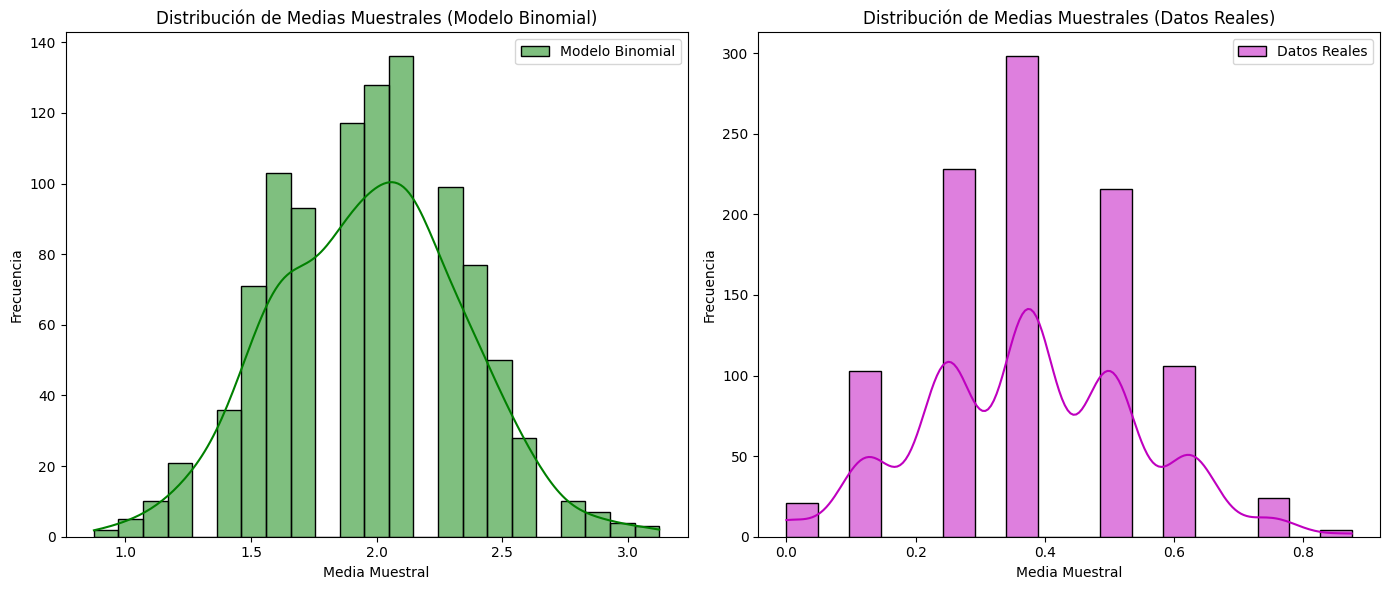

In [23]:


# Calcular la probabilidad de que una madre sea fumadora
prob_fumadora = dataset['Maternal.Smoker'].mean()
print(f'Probabilidad de que una madre sea fumadora: {prob_fumadora}')

# Construir un modelo de distribución binomial para 5 madres
n = 5
p = prob_fumadora
binom_model = binom(n, p)

# Simular 1000 muestras de tamaño 8 utilizando el modelo binomial
n_muestras = 1000
tamaño_muestra = 8
muestra_binomial = binom_model.rvs(size=n_muestras * tamaño_muestra).reshape(n_muestras, tamaño_muestra)
medias_binomial = muestra_binomial.mean(axis=1)

# Extraer 1000 muestras de tamaño 8 de los datos reales y calcular sus medias muestrales
medias_reales = []

for _ in range(n_muestras):
    muestra = dataset['Maternal.Smoker'].sample(n=tamaño_muestra, replace=True)
    medias_reales.append(muestra.mean())

medias_reales = np.array(medias_reales)

# Comparar gráficamente los resultados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(medias_binomial, kde=True, color='g', label='Modelo Binomial')
plt.title('Distribución de Medias Muestrales (Modelo Binomial)')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(medias_reales, kde=True, color='m', label='Datos Reales')
plt.title('Distribución de Medias Muestrales (Datos Reales)')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()


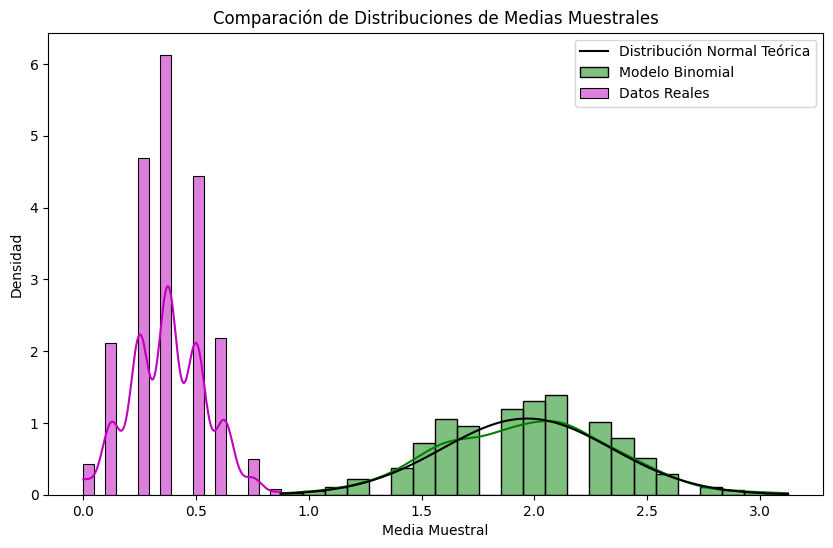

In [24]:
# Verificar el teorema del límite central
# Construir un modelo de distribución normal derivado del modelo binomial y graficarlo
media_teorica = np.mean(medias_binomial)
desviacion_teorica = np.std(medias_binomial)

x = np.linspace(min(medias_binomial), max(medias_binomial), 100)
y = norm.pdf(x, media_teorica, desviacion_teorica)

plt.figure(figsize=(10, 6))
sns.histplot(medias_binomial, kde=True, color='g', label='Modelo Binomial', stat='density')
sns.histplot(medias_reales, kde=True, color='m', label='Datos Reales', stat='density')
plt.plot(x, y, 'k-', label='Distribución Normal Teórica')
plt.title('Comparación de Distribuciones de Medias Muestrales')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Conclusión:
Al comparar los gráficos, vemos que los histogramas de las medias de las muestras reales y las simulaciones binomiales son muy parecidos. Esto sugiere que ambos conjuntos de datos tienen una distribución similar.

Teorema del Límite Central (TLC): Al poner una curva de distribución normal sobre los histogramas, se nota que las medias de las muestras siguen una distribución normal. Esto confirma el TLC, que dice que si tomamos muchas muestras independientes y similares, su media seguirá una distribución normal, sin importar la forma original de los datos.

Modelo Binomial: La distribución normal teórica basada en el modelo binomial se ajusta bien a las medias de las muestras, tanto en los datos reales como en las simulaciones. Esto refuerza el TLC.

En resumen: Los resultados respaldan el TLC y muestran que las medias de las muestras siguen una distribución normal.